In [1]:
import os
#base_path = "C:\\Users\\nknwn\\Downloads"
base_path = "/content"

# DFT

Firstly we go through the derivation of DFT:

Suppose we have $f: \mathbb{R} \rightarrow \mathbb{C}$ which is $2\pi$-periodic. Consider the values of this function at points $\frac{0\cdot 2\pi}{N}$,  $\frac{1\cdot 2\pi}{N}$, ..., $\frac{(N-1)\cdot 2\pi}{N}$. Set $x_j :=\frac{j\cdot 2\pi}{N}$

$$f(x_j) = \sum_{k=-\infty}^\infty \hat{f}(k)e^{ikx_j} = \sum_{k=-\infty}^\infty \hat{f}(k)e^{2\pi i\frac{kj}{N}}$$

Note that for $n\in \mathbb{Z}$ the following holds:

$$e^{2\pi i\frac{(k+nN)j}{N}} = e^{2\pi i\frac{kj}{N}}e^{2\pi i \cdot nj} = e^{2\pi i\frac{kj}{N}} \left(\cos(2\pi \cdot nj)+i \sin(2\pi \cdot nj)\right)=e^{2\pi i\frac{kj}{N}}$$

We group the terms with $k_1 = k_2 \;\mathrm{mod}\; N$ and obtain the following:

\begin{equation} f(x_j)= \sum_{k =0}^{N-1} e^{2\pi i\frac{kj}{N}}\left(\sum_{n=-\infty}^{\infty} \hat{f}(k+nN) \right) = \sum_{k =0}^{N-1} e^{2\pi i\frac{kj}{N}} z_k  \tag{1}\end{equation}

We define the matrix $T_{kj} = \frac{1}{\sqrt N}e^{2\pi i\frac{kj}{N}} =  \frac{1}{\sqrt N} \omega_N^{kj}$, where $\omega_N$ is the Nth root of unity and $y_j := f(x_j)$. Then $y_j=\sqrt{N}{(Tz)}_j \Rightarrow y = \sqrt{N}Tz \Rightarrow z = \frac{1}{\sqrt{N}}T^{-1}y$ (discrete Fourier transform)

Later we use the vector $z$ to indicate the output of the DFT, namely $T^{-1}y$

The crucial observation is that the oscilation of the form $e^{i (k+nN)x}$ for $n>0$ and $k \in {0, ..., N-1}$ cannot be detected using the discretized points. This simply follows from the fact that $e^{i (k+nN)x_j} = e^{i (k+nN)\frac{j\cdot 2\pi}{N}} = e^{i\frac{kj\cdot 2\pi}{N}}e^{2\pi i\cdot nj} = e^{2\pi i\frac{kj}{N}}$ as computed previosuly. Even though the original signal might have the oscilation with rate above $N$, we are unable to detect them using the discrete values of the function $f$, therefore we may just assume each $z_k$ corresponds to the coefficient $\hat{f}(k)$ (basically the contribution of the waves correspoding to the frequencies above $N$ cannot be distinguished from the wave with the respective frequency in the range from $0$ to $N-1$). In sound processing this doesn't pose any issue since human ear cannot hear any frequency above 20 khz, so with enough discretization we basically do not lose any perceivable data.

The following experiment demostrates that:

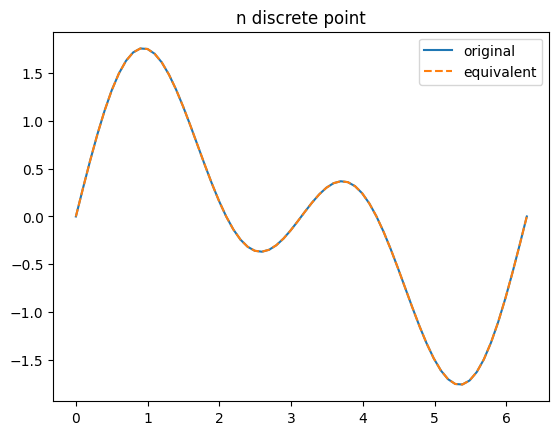

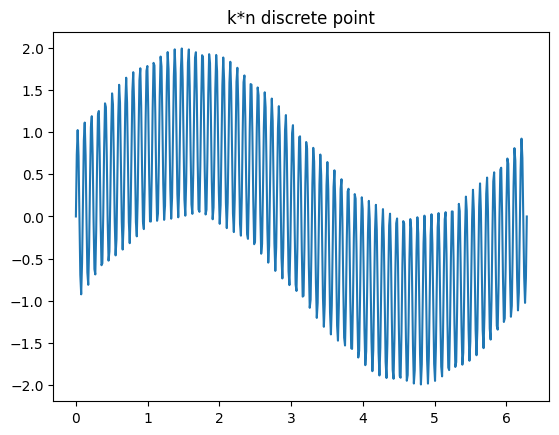

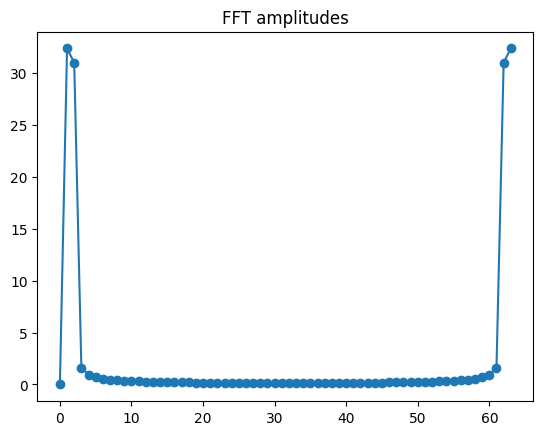

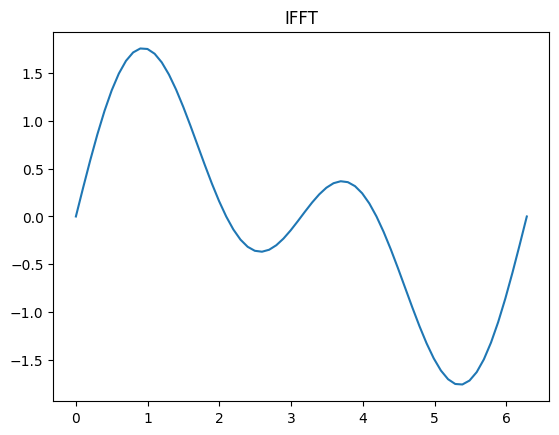

In [2]:
import scipy.fft
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 64
k = 8
m = n + 1

def f(n, m, x):
  return np.sin(x) + np.sin(m*x)

def f_eq(n, m, x):
  return np.sin(x) + np.sin(((m+1) % n)*x)

x_sparse = np.linspace(0, 2*np.pi, n)
x_dense = np.linspace(0, 2*np.pi, k*n)
f_sparse = f(n, m, x_sparse)
f_dense = f(n, m, x_dense)

plt.title("n discrete point")
plt.plot(x_sparse, f_sparse, label="original")
plt.plot(x_sparse, f_eq(n, m, x_sparse), linestyle="dashed", label="equivalent")
plt.legend()
plt.show()

plt.title("k*n discrete point")
plt.plot(x_dense, f_dense)
plt.show()

y = scipy.fft.fft(f_sparse)
plt.title("FFT amplitudes")
plt.plot(np.abs(y), marker = 'o')
plt.show()

plt.title("IFFT")
plt.plot(x_sparse, scipy.fft.ifft(y).real)
plt.show()

$$\begin{aligned}{(T \overline{T^T})}_{jl} = \frac{1}{\sqrt N}\overline{\left(\frac{1}{\sqrt N}\right)}\sum_{k=0}^{N-1}T_{lk}{(\overline{T^T})}_{kl} =\frac{1}{N} \sum_{k=0}^{N-1}T_{jk}\overline{T_{lk}} &=\\ \frac{1}{N} \sum_{k=0}^{N-1}e^{2\pi i jk/N}\overline{e^{2\pi i lk/N}} = \frac{1}{N} \sum_{k=0}^{N-1}{\left( e^{2\pi i (j-l)/N}\right)}^{k}\end{aligned}$$

1. $j \neq l$. Using the formula for sum of geometric series:

$$\sum_{k=0}^{N-1}{\left( e^{2\pi i (j-l)/N}\right)}^{k} = \frac{1 - {\left(e^{2\pi i (j-l)/N}\right)}^N}{1 - e^{2\pi i (j-l)/N}} = \frac{1 - e^{2\pi i (j-l)}}{1 - e^{2\pi i (j-l)/N}} = \frac{1 - 1}{1 - e^{2\pi i (j-l)/N}} =0 \Rightarrow {(T \overline{T^T})}_{jl}=0$$

2. $j = l$. Then:

$$e^{2\pi i (j-l)/N} = e^0=1$$

$$\sum_{k=0}^{N-1}{\left( e^{2\pi i (j-l)/N}\right)}^{k}= \sum_{k=0}^{N-1}1 = N \Rightarrow {(T \overline{T^T})}_{jl} = \frac{1}{N}N=1$$

The matrix T is unitary, so $T^{-1}=\overline{T^T}$

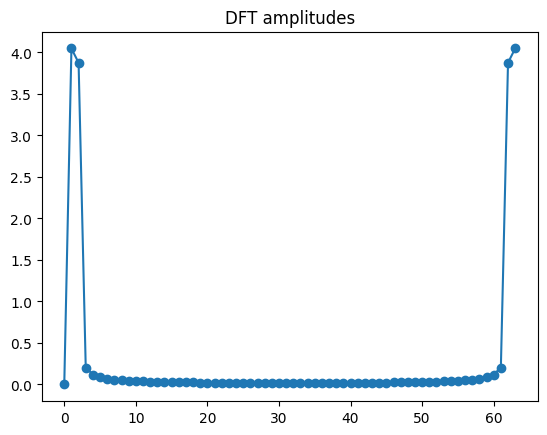

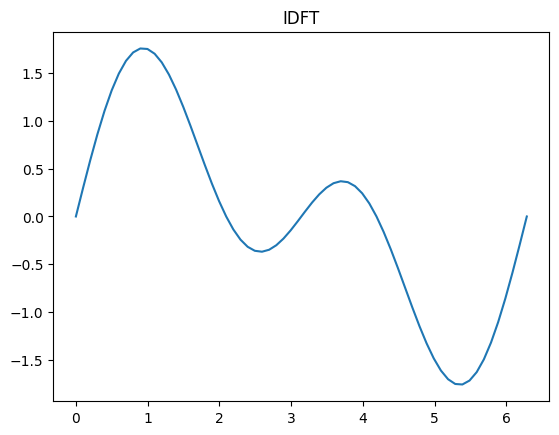

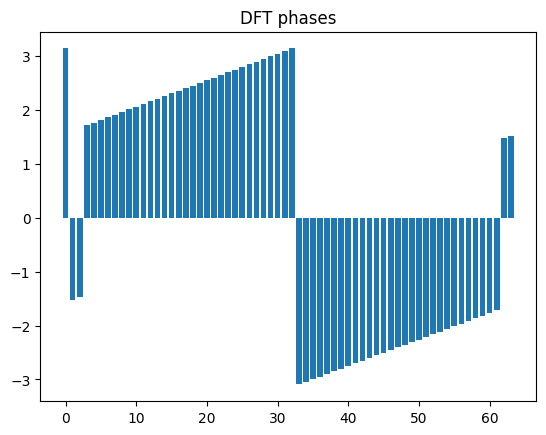

In [3]:
def dft(x, mode='regular'):
    '''
    Args:
      x array or a matrix.
    Returns:
      DFT of each column of x
    '''
    N = len(x)

    interval = np.arange(N)
    X, Y = np.meshgrid(interval, interval)
    powers = X * Y

    if mode == 'regular':
        F = np.exp(-2j * np.pi * powers / N)
    elif mode == 'inverse':
        # conjugate and transpose (F is symmetric, so we omit the transpose)
        F = np.exp(2j * np.pi * powers / N)
    else:
        raise ValueError(f"unknown mode {mode}")

    return (F @ x) / np.sqrt(N)


y = dft(f_sparse)

plt.title("DFT amplitudes")
plt.plot(np.abs(y), marker='o')
plt.show()

plt.title("IDFT")
plt.plot(x_sparse, dft(y, mode='inverse').real)
plt.show()

plt.title("DFT phases")
plt.bar(np.arange(0, n), np.angle(dft(f_sparse)))
plt.show()

# FFT

More theoretical basis:

We have already extablished that the Fourier transform is described by the unitary matrix. That means:

$$T^{-1}_{kl} = {\left(\overline{T^T}\right)}_{kl} = \overline{\frac{1}{\sqrt N} \omega_N^{jk}} = \frac{1}{\sqrt N} \omega_N^{-kj}$$

DFT hence can be written as follows

$$\begin{equation}z_j = {(T^{-1}y)}_j = \sum_{k=0}^{N-1} T_{jk}y_k = \frac{1}{\sqrt N} \sum_{k=0}^{N-1} \omega_N^{-kj}y_k \tag{2} \end{equation}$$

$$z_{N-1-j} = \frac{1}{\sqrt N} \sum_{k=0}^{N-1} \omega_N^{-k(N-1-j)}y_k$$

$\omega_N^{-k(N-1-j)} = \omega_N^{-kN}\omega_N^{k(j+1)} = \omega_N^{k(j+1)}$ using our previous observation.

$$\sum_{k=0}^{N-1} \omega_N^{-k(N-1-j)}y_k = \sum_{k=0}^{N-1} \omega_N^{k(j+1)}y_k $$

For the real valued signal $y$ it holds that $\overline{y_k} = y_k$

$$ \overline{\left(\sum_{k=0}^{N-1} \omega_N^{k(j+1)}y_k\right)} = \sum_{k=0}^{N-1} \overline{\left(\omega_N^{k(j+1)}y_k\right)} = \sum_{k=0}^{N-1} \omega_N^{-k(j+1)}y_k = \sqrt{N}z_{j+1}$$

That means that the first half of the vectoz $z$ is the mirror image of the second half. Therefore we may discard the second half of the output vector without loosing any information.

We make an assumption on $N$, that it is a power of two. Then we set $K = N/2$ which is guaranteed to be even unless $N=2$. The latter case can be handled by the regular DFT. We split the sum in the equation $(2)$ into even and odd parts:

We note that $\omega_K^k = e^{2\pi i \frac{k}{N/2}} = e^{2\pi i \frac{2k}{N}} = \omega_N^{2k}$

$$\begin{equation} \begin{aligned} z_j= \frac{1}{\sqrt N} \sum_{k=0}^{N-1} \omega_N^{-kj}y_k = \frac{1}{\sqrt N} \left(\sum_{\substack{k=0 \\ k\; \text{even}}}^{N-1} \omega_N^{-kj}y_k + \sum_{\substack{k=0 \\ k\; \text{odd}}}^{N-1} \omega_N^{-kj}y_k \right) &=\\ \frac{1}{\sqrt N} \left(\sum_{k=0}^{K-1} \omega_N^{-2kj}y_{2k} + \sum_{k=0}^{K-1} \omega_N^{-{(2k+1)}j}y_{2k+1} \right) &=\\ \frac{1}{\sqrt N} \left(\sum_{k=0}^{K-1} \omega_K^{-kj}y_{2k} + \omega_N^{-j}\sum_{k=0}^{K-1} \omega_K^{-kj}y_{2k+1} \right) &=\\ \frac{1}{\sqrt 2\sqrt K} \left(\sum_{k=0}^{K-1} \omega_K^{-kj}y_{2k} + \omega_N^{-j}\sum_{k=0}^{K-1} \omega_K^{-kj}y_{2k+1} \right) \end{aligned}  \tag{3}\end{equation}$$

Set $y^{(1)} = {(y_0, y_2, ..., y_{2K-2})}^T$ and $y^{(2)} = {(y_1, y_3, ..., y_{2K-1})}^T$. $z^{(1)}$ and $z^{(2)}$ are the corresponding vector obtained by DFT. Then for $j \in \{0, ..., K-1\}$ it holds that $z_j = \frac{1}{\sqrt 2}\left(z^{(1)}_j + \omega_N^{-j} z^{(2)}_j\right)$. For $j\in \{K, ..., N-1\}$ we wrap the index $j$ around by computing $j = j' + K$

We make an observation that $\omega_K^{-kK} = 1$ (full rotation of the root of unity returns to the origin). $\omega_N^{-K} = e^{-2\pi i K/N} = e^{-2\pi i K/(2K)} = e^{-\pi i}=-1$. We rewrite the equation $(3)$ in the following form:

$$\begin{aligned}\sqrt{2K}z_j = \sum_{k=0}^{K-1} \omega_K^{-k(j'+K)}y_{2k} + \omega_N^{-(j'+K)}\sum_{k=0}^{K-1} \omega_K^{-k(j'+K)}y_{2k+1} &= \\ \sum_{k=0}^{K-1} \omega_K^{-kj'}y_{2k} + \omega_N^{-j'}\omega_N^{-K}\sum_{k=0}^{K-1} \omega_K^{-kj'}y_{2k+1} &=\\ \sum_{k=0}^{K-1} \omega_K^{-kj'}y_{2k} - \omega_N^{-j'}\sum_{k=0}^{K-1} \omega_K^{-kj'}y_{2k+1} \end{aligned}$$

Therefore $z_{j'+K} = \frac{1}{\sqrt 2}\left(z^{(1)}_j - \omega_N^{-j} z^{(2)}_j\right)$

In [4]:
def fft(x, mode="regular", min_div=4):
    '''
    Args:
      x array or a matrix. the number of rows must be a power of two
    Returns:
      DFT of each column of x
    '''
    if x.ndim == 1:
        x = x[:, None]
    N = len(x)
    K = N // 2

    if K * 2 != N:
        raise ValueError('Size of the sample must be a power of two')

    if K < min_div:
        return dft(x, mode=mode)

    even_fft = fft(x[::2], mode=mode)
    odd_fft = fft(x[1::2], mode=mode)

    z = np.zeros(x.shape, dtype=complex)
    if mode == "regular":
        multipliers = np.exp(-2j * np.pi * np.arange(K) / N)
    elif mode == "inverse":
        multipliers = np.exp(2j * np.pi * np.arange(K) / N)
    else:
        raise ValueError(f"unknown mode {mode}")

    z[:K] = 1 / np.sqrt(2) * (even_fft + odd_fft * multipliers[:, None]) # multiply row-wise
    z[K:] = 1 / np.sqrt(2) * (even_fft - odd_fft * multipliers[:, None])

    return z

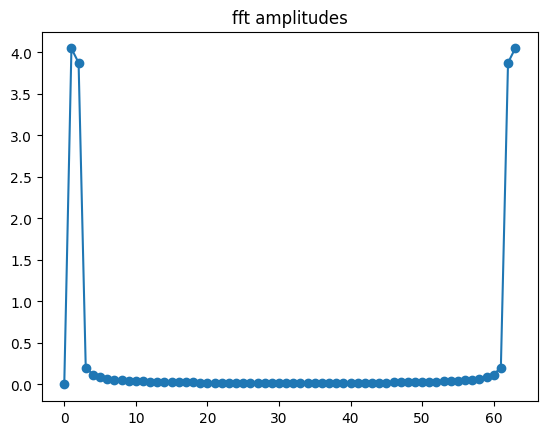

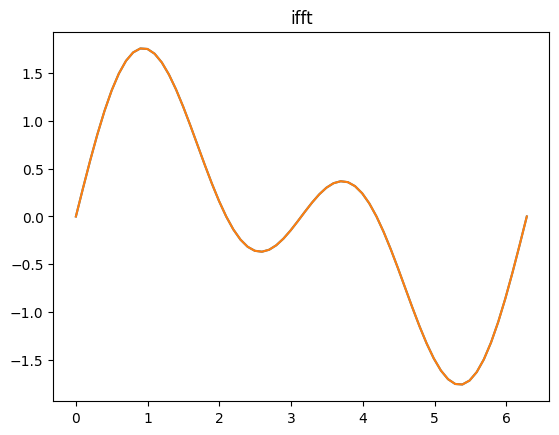

In [5]:
y = fft(f_sparse)

plt.title("fft amplitudes")
plt.plot(np.abs(y), marker='o')
plt.show()

plt.title("ifft")
plt.plot(x_sparse, dft(y, mode="inverse").real)
plt.plot(x_sparse, f_sparse)
plt.show()

DFT is an isomorphism between time and frequency domains. Assuming we have $2\pi$-periodic signal discretized in $N$ point we compute the presence of each frequency in the range $0, ..., N-1$. For instance if we take the sample of 1s duration the frequencies obtained is exactly the spectral data in a sense of physics. If we use the sample with duration less than a second we need to rescale the frequencies we obtain by the factor of sample rate divided by the size of sample

# Sound spectrum

In [6]:
# demonstration of overlapped indexing
a = np.arange(5)
shift = np.array([0, 1, 3])
index = a + shift[:, None]
d = np.arange(8)
sliced = d[index]
print(index)
print(sliced)
d_reconstructed = np.zeros((len(shift), len(d)))

d_reconstructed[np.arange(len(shift))[:, None], index] = sliced
print(d_reconstructed)

[[0 1 2 3 4]
 [1 2 3 4 5]
 [3 4 5 6 7]]
[[0 1 2 3 4]
 [1 2 3 4 5]
 [3 4 5 6 7]]
[[0. 1. 2. 3. 4. 0. 0. 0.]
 [0. 1. 2. 3. 4. 5. 0. 0.]
 [0. 0. 0. 3. 4. 5. 6. 7.]]


/tmp/ipython-input-1986342006.py:12: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(os.path.join(base_path, "sample.wav"))


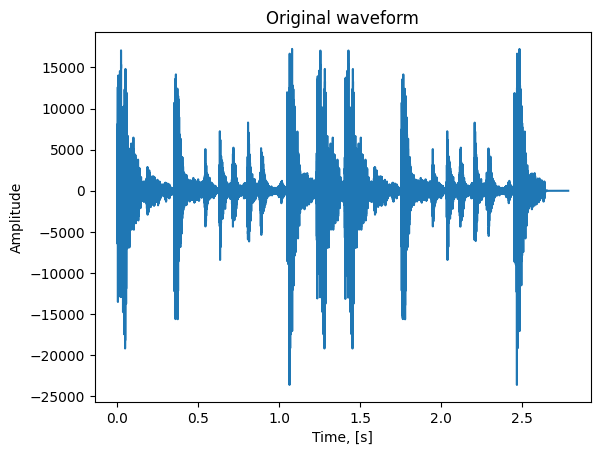

/tmp/ipython-input-1986342006.py:72: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  im = ax.imshow(data_log, aspect='auto', origin='lower',


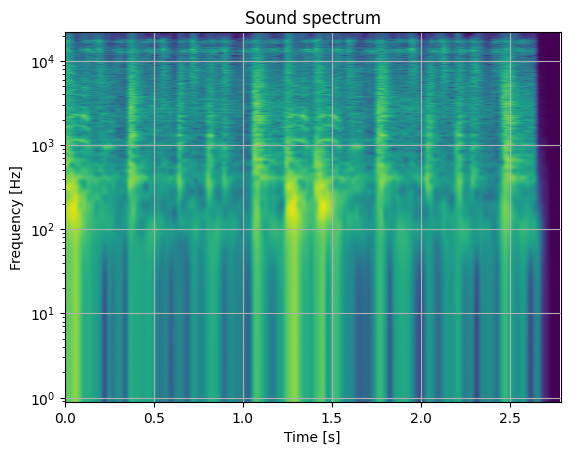

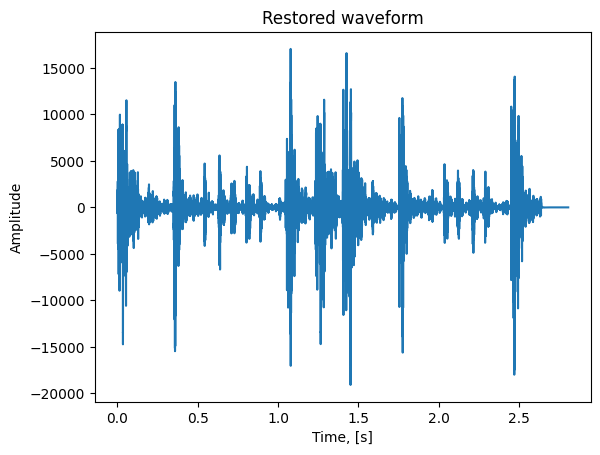

In [142]:
from scipy.io import wavfile
from scipy.sparse import csr_matrix

def time_range(samples_count, sample_rate):
    return np.linspace(0, samples_count / sample_rate, samples_count)

def plot_waveform(data, sample_rate):
    plt.xlabel("Time, [s]")
    plt.ylabel("Amplitude")
    plt.plot(time_range(len(data), sample_rate), data)

sample_rate, data = wavfile.read(os.path.join(base_path, "sample.wav"))

# global constants
frame_size = 1024
overlap = 0.5
wav_range = 32767

plt.title("Original waveform")
plot_waveform(data[:, 0], sample_rate)
plt.show()

def overlap_size(frame_size, overlap):
    return int(frame_size * (1 - overlap))

def overlapped_index(data_size, frame_size, overlap):
    frame_size_overlapped = overlap_size(frame_size, overlap)
    index = np.arange(frame_size) + np.arange(0, data_size - frame_size, frame_size_overlapped)[:, None]
    return index

def split_frames(data, frame_size, overlap):
    frame_size_overlapped = overlap_size(frame_size, overlap)

    padded = np.zeros(data.shape[0] + frame_size)
    padded[:len(data)] = data

    return padded[overlapped_index(len(padded), frame_size, overlap)].T, len(padded)

def restore_from_frames(frames, sample_size, frame_size, overlap):
    frame_size_overlapped = overlap_size(frame_size, overlap)
    frames_count = frames.shape[1]

    window_func = np.hamming(frame_size)
    frames = frames.T * window_func

    column_index = np.arange(frame_size) + (np.arange(frames_count) * frame_size_overlapped)[:, None]
    column_index = column_index.flatten()
    row_index = np.repeat(np.arange(frames_count), frame_size)

    reconstructed = csr_matrix((frames.flatten(), (row_index, column_index)), shape=(frames_count, sample_size))
    reconstructed_plain = reconstructed.sum(axis=0).A1

    return reconstructed_plain

def spectrogram(data, frame_size, overlap):
    frames, sample_size = split_frames(data, frame_size, overlap)
    return fft(frames), sample_size

def restore_from_spectrum(spectral_data, sample_size, frame_size, overlap):
    frames = fft(spectral_data, mode="inverse").real
    return restore_from_frames(frames, sample_size, frame_size, overlap)

def plot_spectrogram(spectral_data, frame_size, sample_rate, im=None, ax=None):
    spectral_data = spectral_data[:frame_size // 2]
    duration = spectral_data.shape[1] * frame_size / sample_rate
    data_log = np.log1p(np.abs(spectral_data))

    if ax is None:
        ax = plt.gca()
    if im is None:
        ax.set_yscale('log')
        im = ax.imshow(data_log, aspect='auto', origin='lower',
                       extent=[0, duration, 0, sample_rate / 2], interpolation='quadric')
        ax.set_xlabel("Time [s]")
        ax.set_ylabel("Frequency [Hz]")
        ax.grid(True)
        return im, ax
    else:
        im.set_data(data_log)
        ax.figure.canvas.draw_idle()
        ax.grid(True)
        return im, ax


spectral_data, sample_size = spectrogram(data[:, 0], frame_size, overlap = 0)

plt.title("Sound spectrum")
plot_spectrogram(spectral_data, frame_size, sample_rate)
plt.show()

reconstructed = restore_from_spectrum(spectral_data, sample_size, frame_size, 0)
plt.title("Restored waveform")
plot_waveform(reconstructed, sample_rate)
plt.show()

# Spectral effects:

## Spectral gate

In [8]:
from matplotlib.widgets import Button, Slider
from IPython.display import Audio, display

/tmp/ipython-input-1986342006.py:72: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  im = ax.imshow(data_log, aspect='auto', origin='lower',


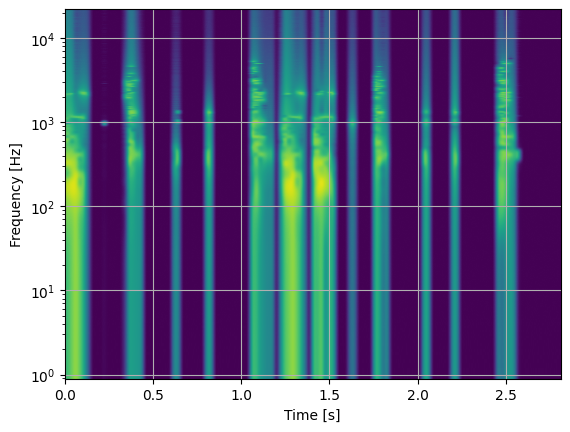

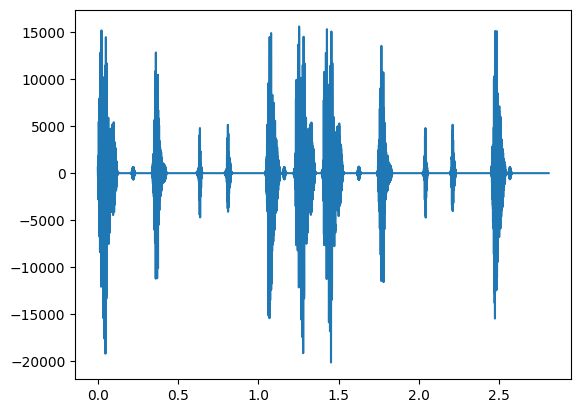

In [143]:
def gate(cutoff, spectral_data, frame_size):
    freq_count = frame_size // 2
    spectral_data = spectral_data.copy()

    spectral_data[np.abs(spectral_data) < cutoff] = 0.0

    return spectral_data

processed_path = os.path.join(base_path, "gated.wav")
spectral_data, sample_size = spectrogram(data[:, 0], frame_size, overlap)
spectral_data_processed = gate(10000, spectral_data, frame_size)
time_data_processed = restore_from_spectrum(spectral_data_processed, sample_size, frame_size, overlap).astype(np.int16)

plot_spectrogram(spectrogram(time_data_processed, frame_size, overlap = 0)[0], frame_size, sample_rate)
plt.show()

plt.plot(time_range(len(time_data_processed), sample_rate), time_data_processed)
plt.show()

wavfile.write(processed_path, sample_rate, time_data_processed)
Audio(filename=processed_path)

# <a name="conv-theorem"></a> Convolution theorem and LPF

$f, g: \mathbb{R}\rightarrow \mathbb{R}$ are $2\pi$-periodic, piecewise continuous and bounded

$$2\pi\cdot \widehat{f*g}(k) = \int_{0}^{2\pi} f*g(x) e^{-ikx} dx = \int_{0}^{2\pi} \left(\int_{0}^{2\pi} f(y)g(x-y) dy\right) \cdot e^{-ikx} dx = \int_{0}^{2\pi} \int_{0}^{2\pi} f(y)g(x-y) e^{-ikx} dy dx$$

Let $F(x,y) = f(y)g(x-y) e^{-ikx}$. Then $\mathrm{Re}(F) = f(y)g(x-y) \cos(kx)$ and $\mathrm{Im}(F) = -f(y)g(x-y) \sin(kx)$

We have that both $f$ and $g$ are bounded, so is their product. Then $|\mathrm{Re}(F)|, |\mathrm{Im}(F)|<C<\infty$. Therefore $\int_{{[0;2\pi]}^2} |\mathrm{Re}(F)(x,y)| d\lambda^2(x,y) \leq \int_{\mathbb{R}^2} C\cdot 𝟙_{{[0;2\pi]}^2}(x,y) d\lambda^2(x,y) = C \lambda^2({[0;2\pi]}^2) = 4\pi^2 C < \infty$. The same holds for $\mathrm{Im}(F)$

Therefore we are allowed to use Fubini's theorem for $\mathrm{Re}(F)$ and $\mathrm{Im}(F)$ since $\mathbb{R}^2$ is $\sigma$-finite (take for instance $[-(n,n), (n,n)]$) and both functions are absolutely integrable

$$\begin{aligned}\int_{0}^{2\pi} \int_{0}^{2\pi} F(x,y) dy dx = \int_{0}^{2\pi} \int_{0}^{2\pi} \mathrm{Re}(F(x,y)) dy dx + i \int_{0}^{2\pi} \int_{0}^{2\pi} \mathrm{Im}(F(x,y)) dy dx &=\\ \int_{0}^{2\pi} \int_{0}^{2\pi} \mathrm{Re}(F(x,y)) dx dy + i \int_{0}^{2\pi} \int_{0}^{2\pi} \mathrm{Im}(F(x,y)) dx dy = \int_{0}^{2\pi} \int_{0}^{2\pi} F(x,y) dx dy \end{aligned}$$

$$\int_{0}^{2\pi} \int_{0}^{2\pi} F(x,y) dx dy = \int_{0}^{2\pi} \int_{0}^{2\pi} f(y)g(x-y) e^{-iky}e^{-ik(x-y)} dx dy = \int_{0}^{2\pi} f(y) e^{-iky} \int_{0}^{2\pi} g(x-y) e^{-ik(x-y)} dx dy$$

$t = x-y$, $\frac{\partial t}{\partial x} = 1$

$$\begin{aligned}\int_{0}^{2\pi} f(y) e^{-iky} \int_{0}^{2\pi} g(x-y) e^{-ik(x-y)} dx dy = \int_{0}^{2\pi} f(y) e^{-iky} \int_{-y}^{2\pi-y}g(t) e^{-ikt} dt dy &=\\ \int_{0}^{2\pi} f(y) e^{-iky} \int_{0}^{2\pi}g(t) e^{-ikt} dt dy = 2\pi\int_{0}^{2\pi} f(y) e^{-iky} \hat{g}(k) dy = 4\pi^2\hat{g}(k) \hat{f}(k)\end{aligned}$$

$$2\pi\widehat{f*g}(k) = 4\pi^2\hat{g}(k) \hat{f}(k) \Rightarrow \frac{1}{2\pi}\widehat{f*g}(k) = \hat{g}(k) \hat{f}(k)$$

This concludes the proof of convolution theorem.

## Low pass filter in time domain

1. Partial Fourier series $S_N(f)$:

$$
\begin{aligned}
S_N(f)(x) &= \sum_{k=-N}^{N} \hat{f}(k) e^{ikx}
= \frac{1}{2\pi} \sum_{k=-N}^{N} \int_{0}^{2\pi} f(y) e^{-iky} \, dy \cdot e^{ikx} \\
&= \frac{1}{2\pi} \sum_{k=-N}^{N} \int_{0}^{2\pi} f(y) e^{-ik(y-x)} \, dy
= \frac{1}{2\pi} \int_{0}^{2\pi} f(y) \sum_{k=-N}^{N} e^{ik(x-y)} \, dy
\end{aligned}
$$

Define the Dirichlet kernel:

$$
D_N(x) = \sum_{k=-N}^{N} e^{ikx}
$$

Then we can rewrite the series as a convolution:

$$
S_N(f)(x) = \frac{1}{2\pi} \int_{0}^{2\pi} f(y) D_N(x-y) \, dy = \frac{1}{2\pi} (f * D_N)(x)
$$

2. Fourier coefficients of the Dirichlet kernel:

$$
\begin{aligned}
\widehat{D_N}(k) &= \frac{1}{2\pi} \int_0^{2\pi} D_N(x) e^{-ikx} \, dx
=  \frac{1}{2\pi} \sum_{n=-N}^{N} \int_0^{2\pi} e^{inx} e^{-ikx} \, dx \\
&=  \frac{1}{2\pi} \sum_{n=-N}^{N} \langle e^{inx}, e^{ikx} \rangle
=  \frac{1}{2\pi} \sum_{n=-N}^{N} 2\pi\delta_{nk} \\
&=
\begin{cases}
1, & k \in [-N, N] \\
0, & \text{otherwise}
\end{cases}
\end{aligned}
$$

3. Using the convolution theorem:

$$
\begin{aligned}
\frac{1}{2\pi} \widehat{f*D_N}(k) &= \widehat{f}(k) \widehat{D_N}(k)
= \widehat{f}(k)\Rightarrow
\widehat{f*D_N}(k) = 2\pi\widehat{f}(k), \; k \in [-N, N]
\end{aligned}
$$

$$\widehat{f*D_N}(k) = 0, \; k \notin [-N, N]$$

Basically, what we derived is an ideal low pass filter for a continuous signla

Remark: The closed formula for Dirichlet kernel is $\frac{\sin((N+1/2)x)}{\sin(x/2)}$


Now we want to derive an ideal low pass filter in discrete space.

Let $z_i = \begin{cases} 0, \;i \in [k;n-k) \\ 1, \; \text{otherwise} \end{cases}$

The inverse DFT transformation is given by $T_{jl} = \frac{1}{\sqrt{N}}(\omega_N^{jl})$

$$\begin{aligned}(Tz)_{j} = \sum_{l=0}^{N-1} T_{jl} z_k
= \sum_{l=0}^{k-1} T_{jl} + \sum_{l=N-k}^{N-1} T_{jl}
= \frac{1}{\sqrt{N}} \left(\sum_{l=0}^{k-1} \omega_N^{jl} + \sum_{l=N-k}^{N-1} \omega_N^{jl} \right)
&=\\ \frac{1}{\sqrt{N}} \left(\sum_{l=0}^{k-1} \omega_N^{jl} + \sum_{l=0}^{k-1} \omega_N^{j(N-1-l)} \right)
= \frac{1}{\sqrt{N}} \left(\sum_{l=0}^{k-1} \omega_N^{jl} + \sum_{l=0}^{k-1} \omega_N^{j(N-1-l)} \right)
&=\\ \frac{1}{\sqrt{N}} \left(\sum_{l=0}^{k-1} \omega_N^{jl} + \sum_{l=0}^{k-1} \omega_N^{jN} \omega_N^{-j} \omega_N^{-jl} \right)
= \frac{1}{\sqrt{N}} \left(\sum_{l=0}^{k-1} \omega_N^{jl} + \omega_N^{-j} \sum_{l=0}^{k-1} \omega_N^{-jl} \right)
\end{aligned}$$

Let $j\neq 0$. Using the sum of geometric series:
$$\sum_{l=0}^{k-1} \omega_N^{jl} = \sum_{l=0}^{k-1} {\left(\omega_N^{j}\right)}^l = \frac{1 - {\left(\omega_N^{j}\right)}^k}{1 - \omega_N^j}$$

Similarly:
$$\omega_N^{-j}\sum_{l=0}^{k-1} \omega_N^{-jl}
= \omega_N^{-j}\sum_{l=0}^{k-1} {\left(\omega_N^{-j}\right)}^l
= \frac{\omega_N^{-j} - \omega_N^{-j}{\left(\omega_N^{-j}\right)}^k}{1 - \omega_N^{-j}}
= \frac{1 - {\left(\omega_N^{-j}\right)}^k}{\omega_N^{j} - 1}
= \frac{{\left(\omega_N^{-j}\right)}^k - 1}{1 - \omega_N^{j}}$$

By combining the terms together:

$$\sum_{l=0}^{k-1} \omega_N^{jl} + \omega_N^{-j} \sum_{l=0}^{k-1} \omega_N^{-jl}
= \frac{1 - {\left(\omega_N^{j}\right)}^k}{1 - \omega_N^j} + \frac{{\left(\omega_N^{-j}\right)}^k - 1}{1 - \omega_N^{j}} = \frac{\omega^{-jk} - \omega^{jk}}{1 - \omega_N^{j}}$$

The resulting formula is $(Tz)_{j}  = \frac{1}{\sqrt{N}} \frac{\omega_N^{-jk} - \omega_N^{jk}}{1 - \omega_N^{j}}$

If $j = 0$, then all the summands are equal to one, so get just $\frac{2k}{N}$

Using a discrete analog to the [convolution theorem](#conv-theorem)

/tmp/ipython-input-806850370.py:5: RuntimeWarning: invalid value encountered in divide
  ir = 1/np.sqrt(n)*(omega**(-j*k) - omega**(j*k))/(1 - omega**j)


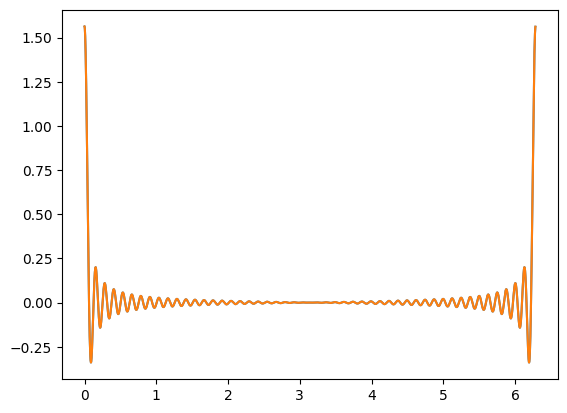

In [65]:
def lpf_ir(n, k):
  omega = np.exp(2j * np.pi / n)
  j = np.arange(0, n)

  ir = 1/np.sqrt(n)*(omega**(-j*k) - omega**(j*k))/(1 - omega**j)
  ir[0] = 2*k/np.sqrt(n)

  return ir

n = 2**12
k = 50

x = np.linspace(0, 2*np.pi, n)
z = np.ones(n)

z[k:-k] = 0

f = fft(z, mode='inverse')
f_anal = lpf_ir(n, k)

plt.plot(x, f)
plt.plot(x, f_anal)
plt.show()

We know that the circular convolution operator is linear, so we can represent it in the form of a matrix.

Let $f: \mathbb{R}^n \to \mathbb{R}^n, x\mapsto x * a$ for the given $a\in \mathbb{R}^n$. Then for $x = e_j$ we have ${(f(e_j))}_k = \sum_{i=0}^{n-1}x_{k-i} a_{i} = a_{j-k}$ since $x_{k-i} = 1 \Leftrightarrow k-i=j \Leftrightarrow i = j-k$. Basically the convolution with $e_j$ shifts the vector $a$ by $k$ positions upwards. Using that observation we can construct the matrix $M(f, B, B)$, where $B$ is the Euclidian basis

In [161]:
def convolve(x, a):
  n = len(a)
  a = a.flatten()

  index = np.mod(np.arange(n) - np.arange(n)[:, None] + n, n)
  C = a[index].T

  return C @ x

x = np.array([[1, 2, 3], [2, 3, 4]]).T
a = np.array([4, 5, 6])

print(convolve(x, a))

[[31 46]
 [31 46]
 [28 43]]


Make a reese bass

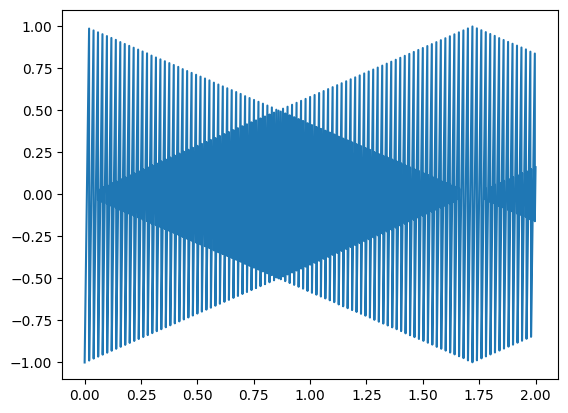

In [162]:
duration = 2

def saw(x, freq):
  return np.mod(x, 1 / freq) * 2 * freq - 1

x = np.linspace(0, duration, sample_rate * duration)
freq = 50
fine = 20

base = saw(x, freq)
overtone = saw(x, freq * 2**(fine/1200))

reese = base + overtone
reese /= np.max(np.abs(reese))

plt.plot(time_range(len(reese), sample_rate), reese)
plt.show()

processed_path = os.path.join(base_path, "saw_unfiltered.wav")
wavfile.write(processed_path, sample_rate, (reese * wav_range).astype(np.int16))
Audio(filename=processed_path)

Filter the reese

/tmp/ipython-input-806850370.py:5: RuntimeWarning: invalid value encountered in divide
  ir = 1/np.sqrt(n)*(omega**(-j*k) - omega**(j*k))/(1 - omega**j)


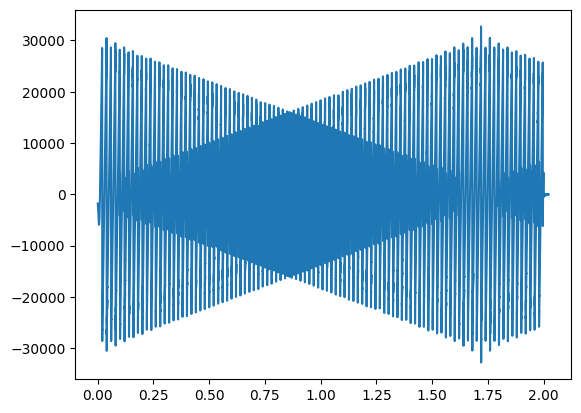

In [173]:
reese_framed, sample_size = split_frames(reese, frame_size, overlap)
reese_framed = reese_framed
filtered_framed = convolve(reese_framed, lpf_ir(frame_size, 50))
reese_filtered = restore_from_frames(filtered_framed, sample_size, frame_size, overlap).real
reese_filtered = reese_filtered / np.max(np.abs(reese_filtered)) * wav_range

plt.plot(time_range(len(reese_filtered), sample_rate), reese_filtered)
plt.show()

processed_path = os.path.join(base_path, "saw_filtered.wav")
wavfile.write(processed_path, sample_rate, reese_filtered.astype(np.int16))
Audio(filename=processed_path)

TODO: prove the other direction for real signals